In [48]:
#best_params_balance = None
#best_result_balance = 0
#best_model_balance = None

#for params in tqdm(itertools.product(range(1,16), range(5,55))):
    #depth, est = params  
    #model =  RandomForestClassifier(random_state=12345, max_depth = depth, n_estimators= est, class_weight='balanced')
    #model.fit(features_train, target_train)
   # result = f1_score(model.predict(features_valid), target_valid)
    #if result > best_result_balance:
       # best_params_balance = params
       # best_result_balance = result
       # best_model_balance = model

#print('Class_weight_balanced')
#print(f'F1 score of best model {np.round(best_result_balance, 5)}') 
#print(f'\nParams:\nmax_depth = {best_params_balance[0]}\nn_estimators = {best_params_balance[1]}')

750it [01:55,  6.50it/s]

Class_weight_balanced
F1 score of best model 0.63124

Params:
max_depth = 8
n_estimators = 50


In [49]:
best_params_ups = None
best_result_ups = 0
best_model_ups = None

for params in tqdm(itertools.product(range(1,16), range(5,55))):
    depth, est = params  
    model =  RandomForestClassifier(random_state=12345, max_depth = depth, n_estimators= est)
    model.fit(features_upsampled, target_upsampled)
    result = f1_score(model.predict(features_valid), target_valid)
    if result > best_result_ups:
        best_params_ups = params
        best_result_ups = result
        best_model_ups = model

print('Upsamled') 
print(f'F1 score of best model {np.round(best_result_ups, 5)}') 
print(f'\nParams:\nmax_depth = {best_params_ups[0]}\nn_estimators = {best_params_ups[1]}')

750it [02:29,  5.01it/s]

Upsamled
F1 score of best model 0.63297

Params:
max_depth = 13
n_estimators = 35


In [50]:
best_params_downs = None
best_result_downs = 0
best_model_downs = None

for params in tqdm(itertools.product(range(1,16), range(5,55))):
    depth, est = params  
    model =  RandomForestClassifier(random_state=12345, max_depth = depth, n_estimators= est)
    model.fit(features_downsampled, target_downsampled)
    result = f1_score(model.predict(features_valid), target_valid)
    if result > best_result_downs:
        best_params_downs = params
        best_result_downs = result
        best_model_downs = model

print('Downsampled') 
print(f'F1 score of best model {np.round(best_result_downs, 5)}') 
print(f'\nParams:\nmax_depth = {best_params_downs[0]}\nn_estimators = {best_params_downs[1]}')

750it [01:07, 11.11it/s]

Downsampled
F1 score of best model 0.60606

Params:
max_depth = 4
n_estimators = 9


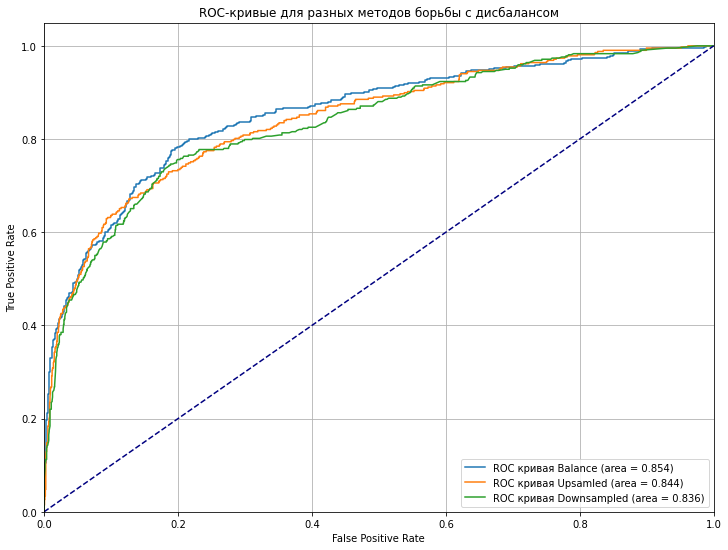

In [51]:
from sklearn.metrics import auc

plt.figure(figsize = [12,9])

for model, model_name in zip([best_model_balance, best_model_ups, best_model_downs],
                             ['Balance', 'Upsamled', 'Downsampled']):

    lr_probs = model.predict_proba(features_valid)[:, 1]

    fpr, tpr, treshold = roc_curve(target_valid, lr_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'ROC кривая {model_name} (area = {np.round(roc_auc, 3)})')
    
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для разных методов борьбы с дисбалансом')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [52]:
for model, model_name in zip([best_model_balance, best_model_ups, best_model_downs],
                             ['Balance', 'Upsamled', 'Downsampled']):

    print(f'F1 {model_name} = {np.round(f1_score(target_test, model.predict(features_test)), 3)}')

F1 Balance = 0.608
F1 Upsamled = 0.605
F1 Downsampled = 0.588


In [56]:
#for model, model_name in zip([best_model_balance, best_model_ups, best_model_downs],
                             #['Balance', 'Upsamled', 'Downsampled']):
    #print(f'{model_name}\n{model}\n')

Balance
RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=50,
                       random_state=12345)

Upsamled
RandomForestClassifier(max_depth=13, n_estimators=35, random_state=12345)

Downsampled
RandomForestClassifier(max_depth=4, n_estimators=9, random_state=12345)



<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import itertools
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle

In [3]:
data = pd.read_csv('/datasets/Churn.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/Churn.csv'

In [4]:
print(data.head())

NameError: name 'data' is not defined

In [5]:
display(data)

NameError: name 'data' is not defined

In [2]:
print(data.info())

In [6]:
def check_columns(data_frame):
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].unique())
        
check_columns(data)

Уникальные значения столбца RowNumber
[    1     2     3 ...  9998  9999 10000]
Уникальные значения столбца CustomerId
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
Уникальные значения столбца Surname
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Уникальные значения столбца CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 61

Заменим все NaN из столбца Tenure на 0.

In [7]:
data['Tenure'] = data['Tenure'].fillna(0)
data.isna().mean()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [8]:
#data['Tenure'].value_counts()

0.0     1291
1.0      952
2.0      950
8.0      933
3.0      928
5.0      927
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
Name: Tenure, dtype: int64

Удалим столбцы RowNumber, CustomerId и Surname. Они не нужны при исследовании модели.

RowNumber повторяет индекс датафрейма, CustomerId - случайный или последовательный номер, который никак не зависит от действий пользователя. Surname - признак, который отличается от человека к человеку и является именем в обществе. Это не гарант того, что клиент останется или уйдет.

In [9]:
data = data.drop(['RowNumber','CustomerId','Surname'], axis=1)
data.shape

(10000, 11)

Создадим датафрейм, созданный по методу прямого кодирования с защитой от дамми-ловушки.

In [10]:
ohe_data = pd.get_dummies(data, drop_first=True)
ohe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


Вывод: Данные готовы к исследованию.

Были удалены не влияющие на конечный фактор данные. Мы создаем модель классификации

## Исследование задачи

Будем использовать следующие модели:

Логистическая регрессия
Случайный лес
Решающее дерево

Разобъем данные

In [11]:
target = ohe_data['Exited']
features = ohe_data.drop('Exited', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, 
                                                                              random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, 
                                                                              random_state=12345 )
print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)

(6000, 11) (2000, 11) (2000, 11)
(6000,) (2000,) (2000,)


Посмотрим, какой существует дисбаланс классов.

In [12]:
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Соотношение классов 1:4. Изучим модели без исправление баланса.

Начнем с решающего дерева. Проведем исследование при разном значении max_depth.

In [13]:
%%time

for depth in range(2, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('Max depth', depth,'F1-score', f1_score(target_valid, predicted_valid))

Max depth 2 F1-score 0.5217391304347825
Max depth 3 F1-score 0.4234875444839857
Max depth 4 F1-score 0.5528700906344411
Max depth 5 F1-score 0.5406249999999999
Max depth 6 F1-score 0.5696969696969697
Max depth 7 F1-score 0.5320813771517998
Max depth 8 F1-score 0.5449010654490106
Max depth 9 F1-score 0.5786516853932585
Max depth 10 F1-score 0.5297450424929179
Max depth 11 F1-score 0.5247657295850067
Max depth 12 F1-score 0.503916449086162
Max depth 13 F1-score 0.528497409326425
Max depth 14 F1-score 0.4864864864864865
Max depth 15 F1-score 0.5056603773584907
Max depth 16 F1-score 0.49370277078085645
Max depth 17 F1-score 0.47407407407407404
Max depth 18 F1-score 0.4926108374384236
Max depth 19 F1-score 0.4945454545454545
Max depth 20 F1-score 0.5054151624548736
Max depth 21 F1-score 0.49821215733015495
Max depth 22 F1-score 0.4817518248175182
Max depth 23 F1-score 0.4817518248175182
Max depth 24 F1-score 0.4817518248175182
Max depth 25 F1-score 0.4817518248175182
Max depth 26 F1-score 0

Лучший результат при глубине 9

Рассмотрим, как себя ведет случайный лес. И проведем исследование на разное количество деревьев

In [14]:
%time

for estimator in range(50, 300, 10):
    model =  RandomForestClassifier(random_state=12345, n_estimators=estimator)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('N estimators', estimator,'F1', f1_score(target_valid, predicted_valid))

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.53 µs
N estimators 50 F1 0.5812220566318926
N estimators 60 F1 0.5824665676077266
N estimators 70 F1 0.5866666666666667
N estimators 80 F1 0.5824665676077266
N estimators 90 F1 0.5798816568047338
N estimators 100 F1 0.5807407407407408
N estimators 110 F1 0.5802650957290133
N estimators 120 F1 0.5911764705882353
N estimators 130 F1 0.5798816568047338
N estimators 140 F1 0.5786350148367952
N estimators 150 F1 0.5845697329376854
N estimators 160 F1 0.5824665676077266
N estimators 170 F1 0.573134328358209
N estimators 180 F1 0.5761194029850746
N estimators 190 F1 0.5727002967359051
N estimators 200 F1 0.573134328358209
N estimators 210 F1 0.573134328358209
N estimators 220 F1 0.5761194029850746
N estimators 230 F1 0.5756676557863503
N estimators 240 F1 0.5748502994011976
N estimators 250 F1 0.5752608047690015
N estimators 260 F1 0.5769805680119582
N estimators 270 F1 0.5782414307004471
N estimators 280 F1 0.5799701046337816
N es

Лучший результат был получен на 110-120 n_estimators. Сделаем исследование с шагом 1

In [15]:
%%time

for estimator in range(110, 121, 1):
    model =  RandomForestClassifier(random_state=12345, n_estimators=estimator)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('N estimators', estimator,'F1', f1_score(target_valid, predicted_valid))

N estimators 110 F1 0.5802650957290133
N estimators 111 F1 0.5827232796486091
N estimators 112 F1 0.5814977973568282
N estimators 113 F1 0.5814977973568282
N estimators 114 F1 0.5823529411764706
N estimators 115 F1 0.5844346549192364
N estimators 116 F1 0.5811209439528023
N estimators 117 F1 0.5873715124816447
N estimators 118 F1 0.5857988165680473
N estimators 119 F1 0.5903083700440529
N estimators 120 F1 0.5911764705882353
CPU times: user 9.01 s, sys: 31.7 ms, total: 9.04 s
Wall time: 9.06 s


Лучший результат по гиперпараметру n_estimators достигнут на 120

Исследуем, как работает Логистическая регрессия на этих данных

In [16]:
%%time

model =  LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1', f1_score(target_valid, predicted_valid))

F1 0.08385744234800838
CPU times: user 41.7 ms, sys: 24.1 ms, total: 65.8 ms
Wall time: 29.6 ms


Результаты довольно низкие. Возможно precision или recall низкий и близок к 0.

Проведем оценку accuracy, precision и recall, также покажем F-метрику

In [17]:
%%time

model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=120)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Решающее дерево
Точность попадания по классам 0.85
Precision 0.7006802721088435
Recall 0.49282296650717705
F1 0.5786516853932585

Случайный лес
Точность попадания по классам 0.861
Precision 0.767175572519084
Recall 0.48086124401913877
F1 0.5911764705882353

Логистическая регрессия
Точность попадания по классам 0.7815
Precision 0.3389830508474576
Recall 0.04784688995215311
F1 0.08385744234800838

CPU times: user 990 ms, sys: 80.2 ms, total: 1.07 s
Wall time: 1.1 s


Проведем построение ROC-кривой для каждой модели. И выведем показатель AUC-ROC

AUC-ROC DecisionTreeClassifier 0.7899719632952051
AUC-ROC RandomForestClassifier 0.8416289113773976
AUC-ROC LogisticRegression 0.6727584246214894


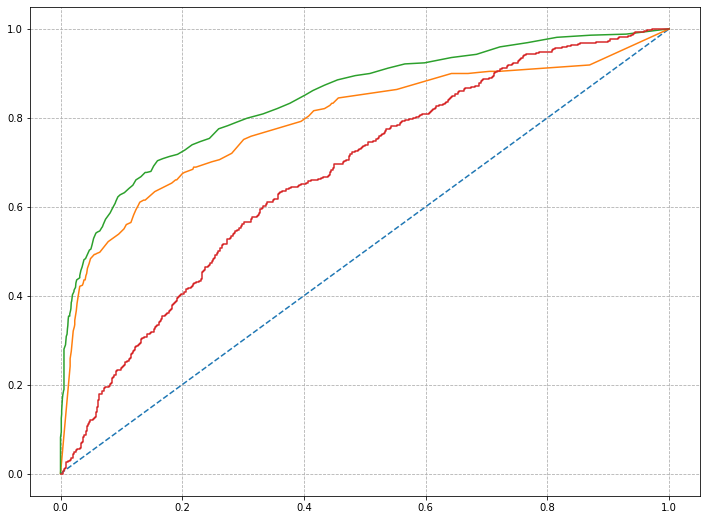

In [18]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
plt.grid(linestyle='--')
model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)

plt.plot(fpr, tpr, label='DecisionTreeClassifier')

model = RandomForestClassifier(random_state=12345, n_estimators=120)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)

plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)

plt.plot(fpr, tpr, label='LogisticRegression')

По полученным результатам можно заменить, что метрика f1 и AUC-ROC лучшая на случаном лесе

Вывод по шагу 2
В данных сущестует дисбаланс классов в отношении 1:4.

Возможно он влияет на качество изучаемых моделей.

Все модели имеют recall ниже, чем percision, из-за перекоса данных, что влияет на F-меру.

## Борьба с дисбалансом

Для борьбы с дисбалансом выполним сравнение моделей:

С взвешенными классами
С уменьшенной выборкой
С увеличенной выборкой

Изучим возможности моделей по взвешиванию классов

In [19]:
%%time

model = DecisionTreeClassifier(random_state=12345, max_depth=9, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=120, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Решающее дерево
Точность попадания по классам 0.7625
Precision 0.4525790349417637
Recall 0.6507177033492823
F1 0.5338567222767419

Случайный лес
Точность попадания по классам 0.8585
Precision 0.7800829875518672
Recall 0.44976076555023925
F1 0.5705614567526556

Логистическая регрессия
Точность попадания по классам 0.6585
Precision 0.33978234582829503
Recall 0.6722488038277512
F1 0.4514056224899599

CPU times: user 890 ms, sys: 71.6 ms, total: 961 ms
Wall time: 943 ms


In [20]:
%%time

for depth in range(2, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('Max depth', depth,'F1-score', f1_score(target_valid, predicted_valid))

Max depth 2 F1-score 0.541015625
Max depth 3 F1-score 0.541015625
Max depth 4 F1-score 0.5277777777777778
Max depth 5 F1-score 0.5963791267305644
Max depth 6 F1-score 0.5581835383159887
Max depth 7 F1-score 0.5559999999999999
Max depth 8 F1-score 0.5401174168297456
Max depth 9 F1-score 0.5338567222767419
Max depth 10 F1-score 0.5163776493256262
Max depth 11 F1-score 0.5316973415132925
Max depth 12 F1-score 0.5097636176772867
Max depth 13 F1-score 0.49891067538126366
Max depth 14 F1-score 0.4845132743362832
Max depth 15 F1-score 0.47410817031070196
Max depth 16 F1-score 0.4739336492890996
Max depth 17 F1-score 0.4786729857819906
Max depth 18 F1-score 0.4710144927536232
Max depth 19 F1-score 0.4556354916067146
Max depth 20 F1-score 0.46398046398046394
Max depth 21 F1-score 0.4691358024691358
Max depth 22 F1-score 0.4600246002460025
Max depth 23 F1-score 0.4556650246305418
Max depth 24 F1-score 0.4556650246305418
Max depth 25 F1-score 0.4556650246305418
Max depth 26 F1-score 0.45566502463

In [21]:
%time

for estimator in range(50, 300, 10):
    model =  RandomForestClassifier(random_state=12345, n_estimators=estimator, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('N estimators', estimator,'F1', f1_score(target_valid, predicted_valid))
    

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
N estimators 50 F1 0.5474006116207951
N estimators 60 F1 0.5579268292682927
N estimators 70 F1 0.5596330275229359
N estimators 80 F1 0.5618320610687023
N estimators 90 F1 0.5614567526555386
N estimators 100 F1 0.5592705167173253
N estimators 110 F1 0.5714285714285714
N estimators 120 F1 0.5705614567526556
N estimators 130 F1 0.5653495440729482
N estimators 140 F1 0.5658093797276854
N estimators 150 F1 0.5649546827794562
N estimators 160 F1 0.5653495440729482
N estimators 170 F1 0.5623100303951367
N estimators 180 F1 0.5636363636363636
N estimators 190 F1 0.56752655538695
N estimators 200 F1 0.563165905631659
N estimators 210 F1 0.5623100303951367
N estimators 220 F1 0.5653495440729482
N estimators 230 F1 0.5670731707317073
N estimators 240 F1 0.5662100456621005
N estimators 250 F1 0.5640243902439024
N estimators 260 F1 0.5640243902439024
N estimators 270 F1 0.5670731707317073
N estimators 280 F1 0.5701219512195123
N estima

F-мера упала у решающего дерева и случайного леса, но выросла у логистической регресии

Исследуем способ уменьшения значений класса 0

In [22]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(target_downsampled.value_counts())

0    1201
1    1196
Name: Exited, dtype: int64


In [23]:
%%time

model = DecisionTreeClassifier(random_state=12345, max_depth=5)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=110)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Решающее дерево
Точность попадания по классам 0.799
Precision 0.5140350877192983
Recall 0.7009569377990431
F1 0.5931174089068827

Случайный лес
Точность попадания по классам 0.7785
Precision 0.4802527646129542
Recall 0.7272727272727273
F1 0.5784966698382493

Логистическая регрессия
Точность попадания по классам 0.6555
Precision 0.33849821215733017
Recall 0.6794258373205742
F1 0.45186953062848056

CPU times: user 434 ms, sys: 44 ms, total: 478 ms
Wall time: 438 ms


Исследуем методы увеличения класса 1.

In [24]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(target_upsampled.value_counts())

0    4804
1    4784
Name: Exited, dtype: int64


In [25]:
%%time

model = DecisionTreeClassifier(random_state=12345, max_depth=5)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=110)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Решающее дерево
Точность попадания по классам 0.8105
Precision 0.5374280230326296
Recall 0.6698564593301436
F1 0.5963791267305644

Случайный лес
Точность попадания по классам 0.8495
Precision 0.6756756756756757
Recall 0.5382775119617225
F1 0.5992010652463382

Логистическая регрессия
Точность попадания по классам 0.6605
Precision 0.34143377885783716
Recall 0.6722488038277512
F1 0.45286059629331177

CPU times: user 1.07 s, sys: 27.9 ms, total: 1.1 s
Wall time: 1.09 s


Выведем ROC-кривую и AUC-ROC для посленнего измененного баланса

AUC-ROC DecisionTreeClassifier 0.8310244134068074
AUC-ROC RandomForestClassifier 0.8373485503783594
AUC-ROC LogisticRegression 0.719318408652363


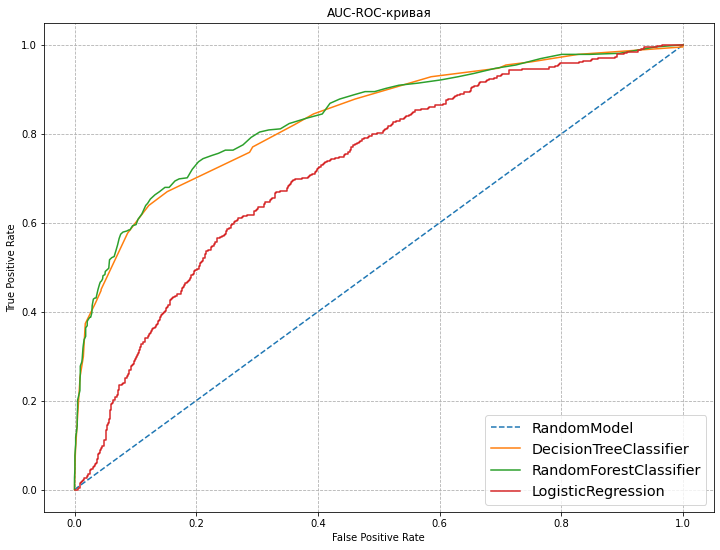

In [26]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
plt.grid(linestyle='--')

model = DecisionTreeClassifier(random_state=12345, max_depth=5)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

model = RandomForestClassifier(random_state=12345, n_estimators=110)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("AUC-ROC-кривая")
plt.show()

Вывод по шагу 3
Дисбаланс повлиял на модели в худшую сторону. Лучшим решением стало увеличение классов 1 в тренировочной выборке.

Выравние классов в выборке привело к резкому росту параметра recall и небольшому понижению percison. Но в целом F-мера выросла.

## Тестирование модели

К тестовой выборке примем модель случайного дерева. Исследуем гиперпараметры и улучшим F-меру модели.

Начнем с гиперпараметра n_estimators.

In [27]:
%%time

for estimator in range(10, 500, 10):
    model =  RandomForestClassifier(random_state=12345, n_estimators=estimator)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('N estimators', estimator,'F1', f1_score(target_valid, predicted_valid))

N estimators 10 F1 0.5795148247978436
N estimators 20 F1 0.5860215053763441
N estimators 30 F1 0.5927903871829105
N estimators 40 F1 0.5861601085481682
N estimators 50 F1 0.5907859078590785
N estimators 60 F1 0.5956873315363881
N estimators 70 F1 0.5946666666666667
N estimators 80 F1 0.5935828877005347
N estimators 90 F1 0.5913978494623655
N estimators 100 F1 0.5973333333333333
N estimators 110 F1 0.5992010652463382
N estimators 120 F1 0.5994694960212201
N estimators 130 F1 0.6084656084656085
N estimators 140 F1 0.6066225165562914
N estimators 150 F1 0.6050198150594451
N estimators 160 F1 0.6076618229854689
N estimators 170 F1 0.6050198150594451
N estimators 180 F1 0.6105263157894737
N estimators 190 F1 0.6050198150594451
N estimators 200 F1 0.6042216358839051
N estimators 210 F1 0.6055776892430279
N estimators 220 F1 0.6039735099337747
N estimators 230 F1 0.600265604249668
N estimators 240 F1 0.6039735099337747
N estimators 250 F1 0.5957446808510638
N estimators 260 F1 0.6023778071334

Лучший результат лежит в диапазоне 170-180.

In [28]:
%%time

for estimator in range(170, 181):
    model =  RandomForestClassifier(random_state=12345, n_estimators=estimator)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('N estimators', estimator,'F1', f1_score(target_valid, predicted_valid))

N estimators 170 F1 0.6050198150594451
N estimators 171 F1 0.6089238845144357
N estimators 172 F1 0.6060606060606061
N estimators 173 F1 0.6073298429319371
N estimators 174 F1 0.6042216358839051
N estimators 175 F1 0.6062992125984252
N estimators 176 F1 0.6086956521739131
N estimators 177 F1 0.6089238845144357
N estimators 178 F1 0.6086956521739131
N estimators 179 F1 0.611764705882353
N estimators 180 F1 0.6105263157894737
CPU times: user 17.8 s, sys: 63.9 ms, total: 17.9 s
Wall time: 17.9 s


Лучший F1 при n_estimators = 179

In [29]:
%%time

model =  RandomForestClassifier(random_state=12345, n_estimators=179, criterion='entropy')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('F1', f1_score(target_valid, predicted_valid))

F1 0.6068601583113458
CPU times: user 2.02 s, sys: 7.98 ms, total: 2.02 s
Wall time: 2.03 s


Изменим гиперпараметр min_samples_split.

In [30]:
%%time

for samples_split in range(1, 11):
    model =  RandomForestClassifier(random_state=12345, n_estimators=estimator, min_samples_split=samples_split/10)
    model.fit(features_upsampled, target_upsampled)
    predcted_valid = model.predict(features_valid)
    print('Samples_split', samples_split/10,'F1', f1_score(target_valid, predicted_valid))
    
for samples_split in range(2, 11):
    model =  RandomForestClassifier(random_state=12345, n_estimators=estimator, min_samples_split=samples_split)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('Samples_split', samples_split,'F1', f1_score(target_valid, predicted_valid))

Samples_split 0.1 F1 0.6068601583113458
Samples_split 0.2 F1 0.6068601583113458
Samples_split 0.3 F1 0.6068601583113458
Samples_split 0.4 F1 0.6068601583113458
Samples_split 0.5 F1 0.6068601583113458
Samples_split 0.6 F1 0.6068601583113458
Samples_split 0.7 F1 0.6068601583113458
Samples_split 0.8 F1 0.6068601583113458
Samples_split 0.9 F1 0.6068601583113458
Samples_split 1.0 F1 0.6068601583113458
Samples_split 2 F1 0.6105263157894737
Samples_split 3 F1 0.6066225165562914
Samples_split 4 F1 0.6055045871559633
Samples_split 5 F1 0.6141935483870967
Samples_split 6 F1 0.617157490396927
Samples_split 7 F1 0.6182728410513142
Samples_split 8 F1 0.617906683480454
Samples_split 9 F1 0.6280788177339901
Samples_split 10 F1 0.6222222222222222
CPU times: user 20.2 s, sys: 91.7 ms, total: 20.3 s
Wall time: 20.3 s


In [31]:
best_params= None
best_result = 0
for params in tqdm(itertools.product(range(1,11), range(1,11), range(1,5))):
    depth, est, min_s_l = params  
    model =  RandomForestClassifier(random_state=12345, max_depth = depth, n_estimators= est, min_samples_leaf = min_s_l)
    model.fit(features_upsampled, target_upsampled)
    result = model.score(features_valid, target_valid)
    if result > best_result:
            best_params = params
            best_result = result
print(f'Score of best model {np.round(best_result, 5)}') 
print(f'\nParams:\nmax_depth = {best_params[0]}\nn_estimators = {best_params[1]}\nmin_samples_leaf = {best_params[2]}')

400it [00:14, 26.95it/s]

Score of best model 0.83

Params:
max_depth = 1
n_estimators = 7
min_samples_leaf = 1


Лучший F1 получени при min_samples_split=9.

Изменим гиперпараметр min_samples_leaf.

In [32]:
%%time

for samples_leaf in range(1, 8):
    model =  RandomForestClassifier(random_state=12345, n_estimators=estimator, min_samples_split=7, 
                                    min_samples_leaf= samples_leaf)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('Samples_leaf', samples_leaf,'F1', f1_score(target_valid, predicted_valid))
    
for samples_leaf in range(2, 11):
    model =  RandomForestClassifier(random_state=12345, n_estimators=estimator, min_samples_split=7,
                                   min_samples_leaf= samples_leaf)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('Samples_leaf', samples_leaf,'F1', f1_score(target_valid, predicted_valid))
    


Samples_leaf 1 F1 0.6182728410513142
Samples_leaf 2 F1 0.6181818181818183
Samples_leaf 3 F1 0.6241134751773049
Samples_leaf 4 F1 0.6273148148148147
Samples_leaf 5 F1 0.6231721034870641
Samples_leaf 6 F1 0.6279329608938549
Samples_leaf 7 F1 0.6387665198237885
Samples_leaf 2 F1 0.6181818181818183
Samples_leaf 3 F1 0.6241134751773049
Samples_leaf 4 F1 0.6273148148148147
Samples_leaf 5 F1 0.6231721034870641
Samples_leaf 6 F1 0.6279329608938549
Samples_leaf 7 F1 0.6387665198237885
Samples_leaf 8 F1 0.6224156692056584
Samples_leaf 9 F1 0.6223175965665235
Samples_leaf 10 F1 0.6244635193133048
CPU times: user 26.3 s, sys: 99.9 ms, total: 26.4 s
Wall time: 26.5 s


Лучший показатель min_samples_leaf = 7

Проверим на тестовой выборке четыре модели: на дисбалансных данных и сбалансированных: со взвешенными классами, усечением 0 класса и расширением класса 1

In [33]:
model = RandomForestClassifier(random_state=12345, n_estimators=estimator, min_samples_split=9,
                                   min_samples_leaf=7)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Случайный лес - дисбаланс классов')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=estimator, min_samples_split=9,
                                   min_samples_leaf=7, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Случайный лес - взвешенные классы')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=estimator, min_samples_split=9,
                                   min_samples_leaf=7)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
print('Случайный лес - уменьшенное количество классов 0')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=estimator, min_samples_split=9,
                                   min_samples_leaf=7)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print('Случайный лес - увеличенное количество классов 1')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

Случайный лес - дисбаланс классов
Точность попадания по классам 0.841
Precision 0.7419354838709677
Recall 0.3806146572104019
F1 0.5031249999999999

Случайный лес - взвешенные классы
Точность попадания по классам 0.8255
Precision 0.5797413793103449
Recall 0.6359338061465721
F1 0.6065388951521984

Случайный лес - уменьшенное количество классов 0
Точность попадания по классам 0.775
Precision 0.47976011994003
Recall 0.7565011820330969
F1 0.5871559633027523

Случайный лес - увеличенное количество классов 1
Точность попадания по классам 0.823
Precision 0.570264765784114
Recall 0.6619385342789598
F1 0.612691466083151



AUC-ROC RandomForestClassifier - disbalanced 0.8589010764971045
AUC-ROC RandomForestClassifier - balanced by class weight 0.8573300293372069
AUC-ROC RandomForestClassifier - balanced by reduce 0 class 0.8507010498132882
AUC-ROC RandomForestClassifier - balanced by grow 1 class 0.8578741992981257


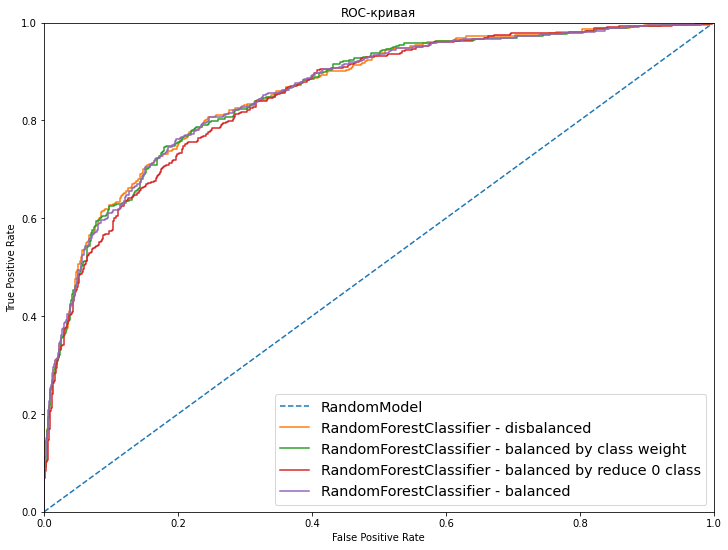

In [34]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')


model = RandomForestClassifier(random_state=12345, n_estimators=estimator, min_samples_split=9,
                                   min_samples_leaf=7)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - disbalanced',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - disbalanced')

model = RandomForestClassifier(random_state=12345, n_estimators=estimator, min_samples_split=9,
                                   min_samples_leaf=7, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - balanced by class weight',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - balanced by class weight')

model = RandomForestClassifier(random_state=12345, n_estimators=estimator, min_samples_split=9,
                                   min_samples_leaf=7)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - balanced by reduce 0 class',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - balanced by reduce 0 class')

model = RandomForestClassifier(random_state=12345, n_estimators=estimator, min_samples_split=9,
                                   min_samples_leaf=7)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - balanced by grow 1 class',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - balanced')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

Вывод по шагу 4
2 из 4 моделей достигли минимума F-меры на тестовых данных: модель случайного леса со взвешенными весами классов и модель с увеличенным количеством класса 1.

В результате исследования была получена модель с лучшими показателями как по F1-мере, так и по AUC-ROC - Случайный лес: взвешенные классы

Итоговый вывод

При работе с проектом было выполнено:

Изучены данные. Разбиты данные на тренировочную, валидационную и тестовую выборку.
Исследована задача. Проверены модели на данных без изменений.
Скоректирован балланс класса. Изменен вес класса.
Получена улученная модель. Проведен поиск гиперпараметров.
Проведен финальный тест.


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [х]  Весь код выполняется без ошибок
- [х]  Ячейки с кодом расположены в порядке исполнения
- [х]  Выполнен шаг 1: данные подготовлены
- [х]  Выполнен шаг 2: задача исследована
    - [х]  Исследован баланс классов
    - [х]  Изучены модели без учёта дисбаланса
    - [х]  Написаны выводы по результатам исследования
- [х]  Выполнен шаг 3: учтён дисбаланс
    - [х]  Применено несколько способов борьбы с дисбалансом
    - [х]  Написаны выводы по результатам исследования
- [х]  Выполнен шаг 4: проведено тестирование
- [х]  Удалось достичь *F1*-меры не менее 0.59
- [х]  Исследована метрика *AUC-ROC*